# Machine Learning Project
### Shima Rahimi
### Student Number: 20214939

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import sklearn 
print(sklearn.__version__)
np.random.seed(8)

0.24.2


### 1. Data collection and inspection
We load the red_wine dataset (origin: https://www.kaggle.com/code/djsquiggle/starter-red-wine-quality-fd717a1f-3/data)

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
nRow, nCol = wine.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1599 rows and 12 columns


There are a total of 12 columns including the final quality parameter. Let us try to find out what these columns mean and how do they contribute in determining the quality of the red wine!

- Fixed Acidity: are non-volatile acids that do not evaporate readily
- Volatile Acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
- Citric Acid: acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines
- Residual Sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet
- Chlorides: the amount of salt in the wine
- Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
- Total Sulfur Dioxide: is the amount of free + bound forms of SO2
- Density: sweeter wines have a higher density
- pH: describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
- Alcohol: available in small quantities in wines makes the drinkers sociable
- Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
- Quality: which is the output variable/predictor


In [5]:
wine.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

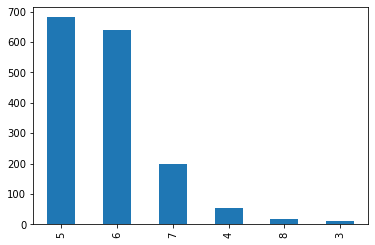

In [8]:
wine.quality.value_counts().plot(kind='bar');

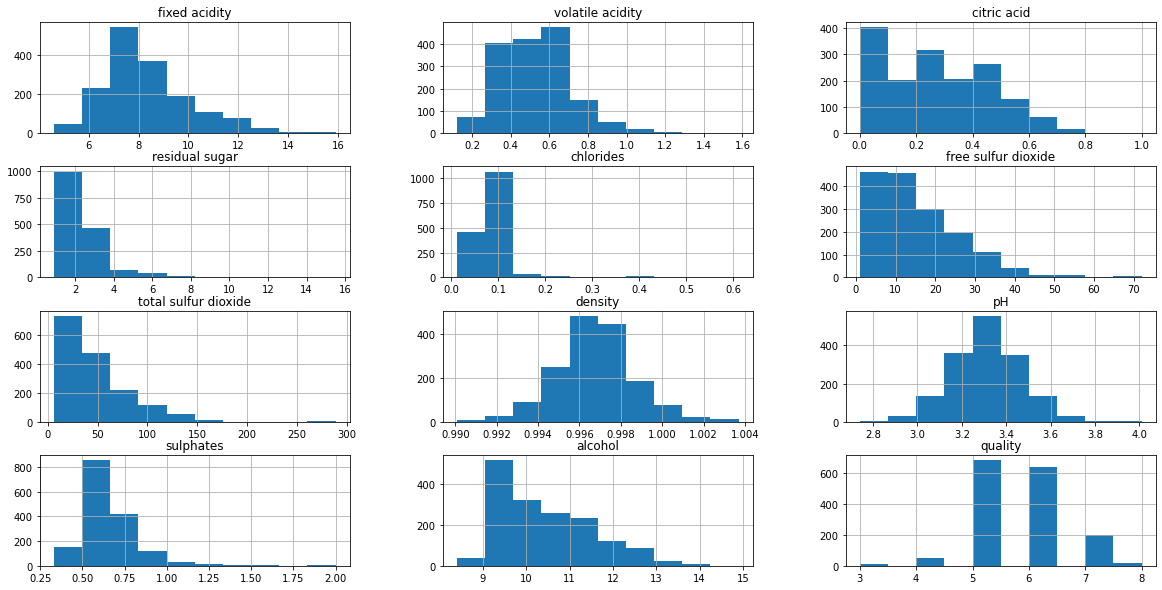

In [9]:
pd.plotting.hist_frame(wine, figsize=(20,10));

In [10]:
#pd.plotting.scatter_matrix(df, figsize=(40, 30));

In [11]:
#correlation analysis
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [12]:
wine.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [13]:
wine.duplicated().sum()

240

Although there are a total of 240 duplicate rows, we will not remove them. We assume that this survey was made by different unique wine tasters who may have given same ratings.

In [14]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing value. 

<AxesSubplot:>

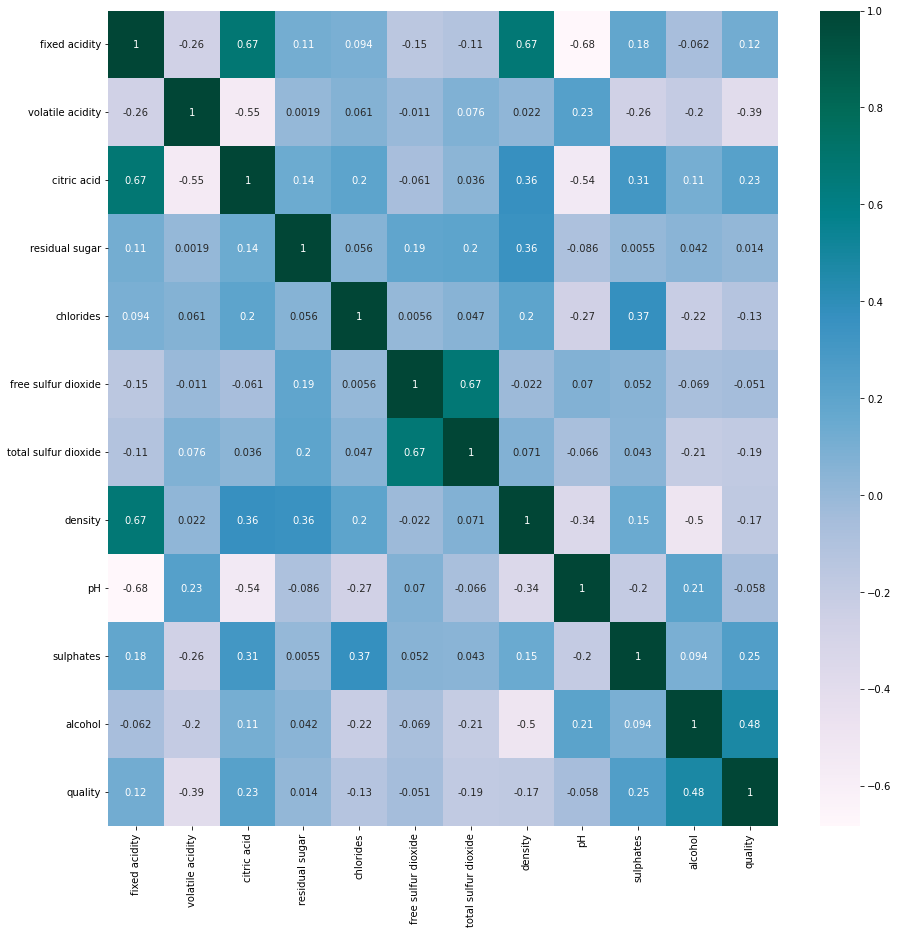

In [15]:
plt.figure(figsize = (15, 15))
sns.heatmap(wine.corr(), annot = True, cmap = 'PuBuGn')

# 1. Classical Methods

### 2. Define input and output

We will use all features as predictors (inputs) except the quality feature. 

In [16]:
X = wine.drop(columns=['quality'])
X.shape, type(X)

((1599, 11), pandas.core.frame.DataFrame)

In [17]:
y = wine.quality
y.shape, type(y)

((1599,), pandas.core.series.Series)

In [18]:
from sklearn.model_selection import train_test_split

We split the wine data into 80% train and 20% test:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=8, test_size=.20)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

### Pipeline

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import cross_val_score

Different features have different ranges of values, so there will be an implicit weighting of features that may not be appropriate. E.g. Fixed acidity and free sulfur dioxide features with their large values compared to the other features, could have more weight in the computation than they deserve. Therefore, it is better to scale the values.

In [22]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

### a. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=8)

logreg_pipe = make_pipeline(scaler, logreg)

In [24]:
logreg_pipe.fit(X_train, y_train)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(random_state=8))])

In [25]:
predictions = logreg_pipe.predict(X_test)
print(classification_report(y_test, predictions))

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.64      0.80      0.71       137
           6       0.54      0.57      0.55       129
           7       0.43      0.16      0.24        37
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.27      0.25      0.25       320
weighted avg       0.54      0.59      0.55       320



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


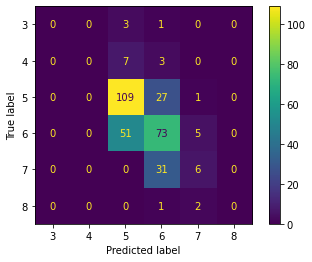

In [26]:
plot_confusion_matrix(logreg_pipe, X_test, y_test);

In [27]:
scores_logreg = cross_val_score(logreg_pipe, X, y, cv=10, scoring='f1_macro')
print(f"Mean {scores_logreg.mean()}, Std {scores_logreg.std()}")

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean 0.24912871669214137, Std 0.04276313181925241


### b. DecisionTree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

DecTree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=8)

DecTree_pipe = make_pipeline(scaler, DecTree)

In [29]:
DecTree_pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=8))])

In [30]:
predictions = DecTree_pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.65      0.71      0.68       137
           6       0.53      0.60      0.56       129
           7       0.44      0.30      0.35        37
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.27      0.27      0.27       320
weighted avg       0.54      0.58      0.56       320



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


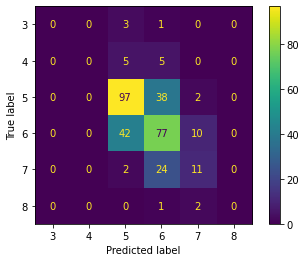

In [31]:
plot_confusion_matrix(DecTree_pipe, X_test, y_test);

In [32]:
scores_DecTree = cross_val_score(DecTree_pipe, X, y, cv=10, scoring='f1_macro')
print(f"Mean {scores_DecTree.mean()}, Std {scores_DecTree.std()}")

Mean 0.25233583895340284, Std 0.04596302629265554


### c. RandomForest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

RandForest = RandomForestClassifier(n_estimators = 100, random_state=8)

RandForest_pipe = make_pipeline(scaler, RandForest)

In [34]:
RandForest_pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=8))])

In [35]:
predictions = RandForest_pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.72      0.82      0.77       137
           6       0.67      0.67      0.67       129
           7       0.67      0.59      0.63        37
           8       0.00      0.00      0.00         3

    accuracy                           0.69       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.66      0.69      0.67       320



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


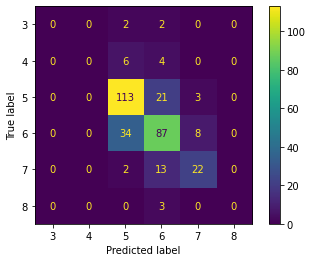

In [36]:
plot_confusion_matrix(RandForest_pipe, X_test, y_test);

In [37]:
scores_RandForest = cross_val_score(RandForest_pipe, X, y, cv=10, scoring='f1_macro')
print(f"Mean {scores_RandForest.mean()}, Std {scores_RandForest.std()}")

Mean 0.29458286852323384, Std 0.06919066872172598


### d. Support Vector Classifier (SVC)

In [38]:
from sklearn.svm import SVC

In [39]:
SuVeCl = SVC(random_state=8)

SuVeCl_pipe = make_pipeline(MinMaxScaler(), SuVeCl)

In [40]:
SuVeCl_pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC(random_state=8))])

In [41]:
predictions = SuVeCl_pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.64      0.81      0.72       137
           6       0.57      0.57      0.57       129
           7       0.44      0.22      0.29        37
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.28      0.27      0.26       320
weighted avg       0.55      0.60      0.57       320



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


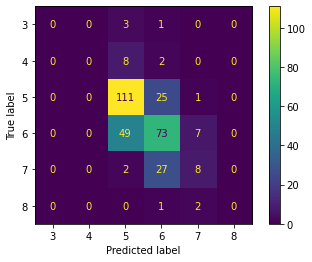

In [42]:
plot_confusion_matrix(SuVeCl_pipe, X_test, y_test);

In [43]:
scores_SuVeCl = cross_val_score(SuVeCl_pipe, X, y, cv=10, scoring='f1_macro')
print(f"Mean {scores_SuVeCl.mean()}, Std {scores_SuVeCl.std()}")

Mean 0.2561029526950622, Std 0.04463697708026931


### Hyperparameter tuning

In [44]:
RandForest_pipe.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=8))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=8),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_impurity_split': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclas

In [45]:
RandForest_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'minmaxscaler', 'randomforestclassifier', 'minmaxscaler__clip', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__max_depth': list(range(10, 15)),
    'randomforestclassifier__max_features': list(range(0,14)),
}

In [47]:
gs = GridSearchCV(RandForest_pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)

In [48]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


C:\Users\Sony\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.34335817 0.34882747 0.34244855 0.3476498  0.35287611
 0.34544882 0.35479195 0.35327625 0.35194074 0.35353246 0.35169059
        nan        nan        nan 0.34083217 0.37465441 0.35029206
 0.35923961 0.37430622 0.35975508 0.38415449 0.36857341 0.3588955
 0.36577407 0.35099591        nan        nan        nan 0.37104279
 0.37584676 0.38765369 0.37144422 0.38347924 0.37273156 0.38028221
 0.36982987 0.3788651  0.37498932 0.36564472        nan        nan
        nan 0.37987796 0.37206926 0.37961655 0.37716343 0.37267697
 0.38389656 0.38186128 0.38269951 0.3817608  0.37909221 0.37185064
        nan      

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=8))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [10, 11, 12, 13,
                                                               14],
                         'randomforestclassifier__max_features': [0, 1, 2, 3, 4,
                                                                  5, 6, 7, 8, 9,
                                                                  10, 11, 12,
                                                                  13]},
             scoring='f1_macro', verbose=1)

In [49]:
gs.best_score_

0.38765368690921825

In [50]:
gs.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=12, max_features=3,
                                        random_state=8))])

In [51]:
predictions = gs.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        10
           5       0.71      0.82      0.76       137
           6       0.63      0.64      0.64       129
           7       0.67      0.54      0.60        37
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.64      0.68      0.65       320



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
results = pd.DataFrame(gs.cv_results_)

In [53]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.153809,0.034756,0.000000,0.000000,10,0,"{'randomforestclassifier__max_depth': 10, 'ran...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
1,0.628846,0.088011,0.051035,0.025999,10,1,"{'randomforestclassifier__max_depth': 10, 'ran...",0.295852,0.322994,0.341455,0.327814,0.331234,0.378775,0.412799,0.374323,0.294632,0.353704,0.343358,0.035469,53
2,0.588818,0.045012,0.034425,0.000801,10,2,"{'randomforestclassifier__max_depth': 10, 'ran...",0.327987,0.316415,0.312403,0.337590,0.364164,0.363050,0.428752,0.378977,0.308452,0.350485,0.348827,0.035079,50
3,0.625345,0.009789,0.034124,0.001376,10,3,"{'randomforestclassifier__max_depth': 10, 'ran...",0.314775,0.311669,0.322944,0.332009,0.351362,0.342508,0.424955,0.382110,0.294354,0.347800,0.342449,0.036061,54
4,0.700898,0.008108,0.034325,0.001848,10,4,"{'randomforestclassifier__max_depth': 10, 'ran...",0.314775,0.315691,0.341050,0.339988,0.350977,0.368113,0.453280,0.376343,0.297505,0.318776,0.347650,0.042383,51


In [54]:
results[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False)

,params,mean_test_score
31,"{'randomforestclassifier__max_depth': 12, 'ran...",0.387654
65,"{'randomforestclassifier__max_depth': 14, 'ran...",0.386410
21,"{'randomforestclassifier__max_depth': 11, 'ran...",0.384154
48,"{'randomforestclassifier__max_depth': 13, 'ran...",0.383897
33,"{'randomforestclassifier__max_depth': 12, 'ran...",0.383479
...,...,...
54,"{'randomforestclassifier__max_depth': 13, 'ran...",NaN
55,"{'randomforestclassifier__max_depth': 13, 'ran...",NaN
56,"{'randomforestclassifier__max_depth': 14, 'ran...",NaN
68,"{'randomforestclassifier__max_depth': 14, 'ran...",NaN


# 2. Neural Models

In [55]:
import tensorflow as tf
print("TensorFlow version:", tf. __version__)
import tensorflow.keras as keras
import seaborn as sns

# to get reproducible results:
np.random.seed(8)
tf.random.set_seed(8)

TensorFlow version: 2.8.0


In [56]:
x = wine.drop(columns=['quality'])
y = wine.quality
x = np.float32(x)
y = np.float32(y)
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = .5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_dev.shape, y_dev.shape)

(1599, 11)
(1599,)
(1199, 11) (400, 11) (1199,) (400,)
(1199, 11) (200, 11) (1199,) (200,) (200, 11) (200,)


In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape= 11))
model.add(keras.layers.Dense(11, activation='relu'))
model.add(keras.layers.Dense(11, activation='relu'))
model.add(keras.layers.Dense(11, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(9, activation='softmax'))
model.summary()
sgd = keras.optimizers.SGD(learning_rate=0.001)

np.random.seed(8)
tf.random.set_seed(8)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)

num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, validation_data = (x_dev, y_dev), callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense_3 (Dense)             (None, 9)                 108       
                                                                 
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
38/38 [==============================] - 2s 14m

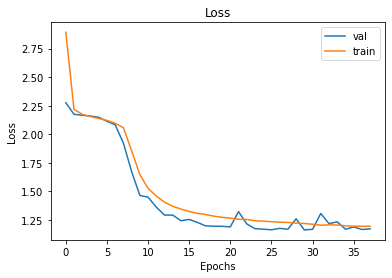

In [58]:
history_dict = history.history
loss_values = history.history['loss']
acc_values = history.history['accuracy']

plt.plot(history.history['val_loss'],  label='val')
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss');
plt.legend()
plt.show()

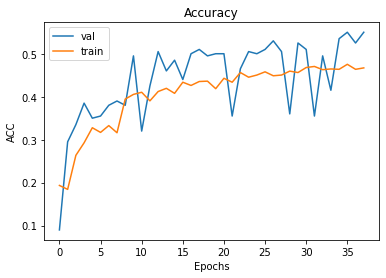

In [59]:
plt.plot(history.history['val_accuracy'],  label='val')
plt.plot(history.history['accuracy'], label='train')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC');
plt.legend()
plt.show()

In [60]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.66      0.53      0.59        98
         6.0       0.58      0.51      0.54        99
         7.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         0

    accuracy                           0.51       200
   macro avg       0.21      0.17      0.19       200
weighted avg       0.61      0.51      0.56       200



C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
